## Linear Regression using pytorch ( part 3 )

This builds on Linear Regression part 1 

Previously we saw how to perform linear regression, on the complete sample. Sometimes (quite often actually) we have thousands of attributes and millions of observations. It's not feasible to fit the entire input data into memory. 

This section describes a different method: gradient descent, which we can use to perform linear regression in batches. Fortunately pytorch makes this easy for us.

In [1]:
import math
import torch
import matplotlib.pyplot as plt

In [2]:
m = 2
c = -5
noisiness = 7
num_points = 20

num_epochs = 500

A method to get the next items in a batch. This sample provides test data, a real method might load items from a file.

In [3]:
def get_next_batch( batch_size ) :
    x = ( torch.rand( batch_size, 1 ) - 0.5 ) * 10
    y = ( ( torch.rand( batch_size, 1 ) - 0.5 ) * noisiness ) + ( x * m + c )
    return x, y

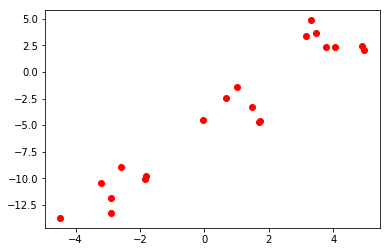

In [4]:
x, y = get_next_batch( num_points )

plt.scatter( x.tolist(), y.tolist(), color='red' )
plt.show()

Run the standard linear regression, to find a straight line fit

In [6]:
linear = torch.nn.Linear( 1, 1, bias=True )
criterion = torch.nn.MSELoss()
learning_parameters = 0.01
optimizer = torch.optim.SGD( linear.parameters(), lr=learning_parameters )

In [7]:
for epoch in range( num_epochs ):
    optimizer.zero_grad()
    
    x_batch, y_batch = get_next_batch( num_points )

    linear_outputs = linear(x_batch)
    loss = criterion(linear_outputs, y_batch)
    loss.backward()
    optimizer.step()

In [8]:
model_m = list( linear.parameters() )[0].item()
model_c = linear.bias.item()
R = torch.tensor( [ model_c, model_m ] ).unsqueeze(1)

Plot the data

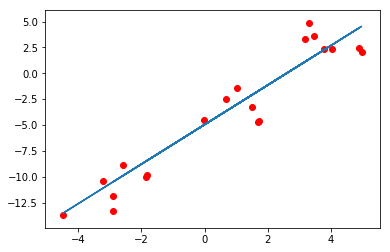

In [9]:
yh = xplusone.mm( R ) 
plt.plot( x.tolist(), yh.tolist() )
plt.scatter( x.tolist(), y.tolist(), color='red' )
plt.show()